# Dataset stats, checking

In [1]:
import numpy as np
from helper_methods import *
from itertools import chain

import networkx as nx
import pickle
import torch
from torch import nn
from torch.nn import Module, Parameter
import torch.nn.functional as F

In [2]:
def compute_stats(train, test):
    ses_tr_len = [len(ses)+1 for ses in train[0]]
    ses_te_len = [len(ses)+1 for ses in test[0]]
    ses_len = ses_tr_len + ses_te_len
    avg_len = sum(ses_len)/len(ses_len)
    unique = set(chain.from_iterable(train[0] + test[0]))
    return sum(ses_len), len(ses_tr_len), len(ses_te_len), len(unique), avg_len

def distrib_stats(train, test):
    ses_tr_len = [len(ses)+1 for ses in train[0]]
    ses_te_len = [len(ses)+1 for ses in test[0]]
    ses_len = ses_tr_len + ses_te_len
    avg_len = sum(ses_len)/len(ses_len)
    unique = set(chain.from_iterable(train[0] + test[0]))
    frequency = list(chain.from_iterable(train[0] + test[0]))

    popularity_dict = {i:frequency.count(i) for i in set(frequency)}
    return frequency, popularity_dict

def print_stats(ses_len, ses_tr_len, ses_te_len, unique, avg_len):    
    print(f"|| DIGINETICA STATS || \
          \n# of clicks: {ses_len} \
          \n# of training sessions: {ses_tr_len} \
          \n# of test sessions: {ses_te_len} \
          \n# of items: {unique} \
          \n# Average length: {avg_len}")

In [3]:
digi_train = pickle.load(open('../datasets/diginetica/train.txt', 'rb'))
digi_test = pickle.load(open('../datasets/diginetica/test.txt', 'rb'))

In [4]:
yoo64_train = pickle.load(open('../datasets/yoochoose1_64/train.txt', 'rb'))
yoo64_test = pickle.load(open('../datasets/yoochoose1_64/test.txt', 'rb'))

In [5]:
all_sessions = digi_train[0] + digi_test[0]

In [6]:
all_sessions_set = [set(ses) for ses in all_sessions]

In [40]:
def intersecting_sets(sets):
    G = nx.Graph()
    i = 0
    # Nodes of the graph should be hashable
    sets_1 = map(frozenset, sets)
    #print(set(sets))
    for to_node in sets_1:
        sets_2 = map(frozenset, sets)
        for from_node in sets_2:
            # off-course you don't want a self loop
            # and only interested in intersecting nodes 
            if to_node != from_node and to_node & from_node:
                G.add_edge(from_node, to_node)
        i += 1
        if i == 1000:
            break
    # and remember to convert the frozen sets to sets
    return [map(set, lst) for lst in nx.connected_components(G)], G

In [41]:
con_components, G = intersecting_sets(all_sessions_set)

KeyboardInterrupt: 

In [64]:
def check_alls(sets):
    all_seen = set()
    distinct_sets = [sets[0]]
    for ses in sets:
        added = False
        for i, ses_2 in enumerate(distinct_sets):
            if ses & ses_2:
                unioned = ses | ses_2
                distinct_sets[i] = distinct_sets[i] | unioned
                added = True
                break    
        if not added:    
            distinct_sets.append(ses_2)
            all_seen = all_seen | unioned


In [65]:
check_alls(all_sessions_set)

KeyboardInterrupt: 

In [33]:
s_lsts = [{1,2,3,4},{1,4},{6},{6,7}]
_, s_G = intersecting_sets(s_lsts) 

In [19]:
all_sessions_set[0] & all_sessions_set[1]

set()

In [63]:
all_yoo_sets = [set(ses) for ses in yoo64_train[0] + yoo64_test[0]]

In [64]:
_, yoo_G = intersecting_sets(all_yoo_sets)

In [72]:
nx.algorithms.is_connected(G)

True

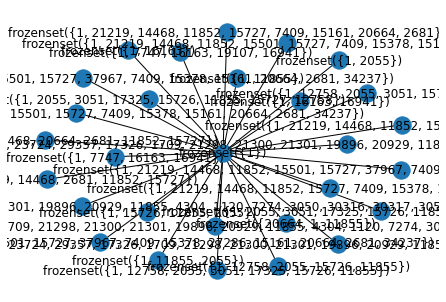

In [102]:
nx.draw(G, with_labels=True)

In [59]:
nx.algorithms.connected_components()

[{frozenset({1}),
  frozenset({1, 11855}),
  frozenset({1, 2055, 11855, 12758, 15726}),
  frozenset({1,
             1120,
             1709,
             2686,
             3050,
             3054,
             3055,
             4304,
             4845,
             5508,
             7274,
             7409,
             8827,
             11855,
             12407,
             14196,
             16905,
             17326,
             17393,
             19896,
             20929,
             21298,
             21300,
             21301,
             22406,
             23724,
             24067,
             24615,
             28320,
             29357,
             30316,
             30317}),
  frozenset({1, 16163}),
  frozenset({1, 7747, 16163, 16941, 19107}),
  frozenset({1, 2681, 7409, 11852, 14468, 15727}),
  frozenset({1, 2681, 7409, 11852, 14468, 15161, 15727, 20664, 21219}),
  frozenset({1,
             1120,
             1709,
             2686,
             3050,
 

In [44]:
con_comp_ls = list(con_components[0])

In [46]:
[len(c) for c in con_comp_ls]

[2,
 5,
 1,
 32,
 5,
 9,
 34,
 9,
 2,
 33,
 8,
 4,
 7,
 6,
 2,
 11,
 14,
 10,
 4,
 35,
 13,
 15,
 6,
 3,
 12,
 8,
 7,
 3,
 3]

In [4]:
fig, ax = plt.subplots()

sns.kdeplot(dig_pop.values(), shade=False, 
            common_norm=True, label='dignitica', ax=ax)
# sns.kdeplot(dig_pop.values(), shade=True, label='diginetica')
plt.legend()

[19427,
 5975,
 19427,
 8023,
 18084,
 26552,
 8414,
 1546,
 6803,
 22763,
 20688,
 22763,
 10774,
 18871,
 13062,
 18871,
 42,
 28510,
 30633,
 19732,
 7412,
 19732,
 3529,
 19732,
 2717,
 19732,
 19732,
 1135,
 2391,
 1135,
 2189,
 2188,
 13431,
 2188,
 13431,
 35340,
 18964,
 5965,
 9093,
 6785,
 16688,
 9093,
 26471,
 34181,
 13177,
 34181,
 24942,
 25297,
 23017,
 10944,
 19291,
 14107,
 23479,
 14264,
 33340,
 32870,
 39014,
 17427,
 36853,
 17427,
 14266,
 17427,
 39014,
 14263,
 34545,
 156,
 24793,
 26599,
 35706,
 13082,
 19059,
 11645,
 32253,
 38963,
 6330,
 38963,
 39052,
 36878,
 35706,
 18580,
 25310,
 39028,
 13332,
 8960,
 8960,
 11645,
 38700,
 20038,
 25310,
 1066,
 30634,
 18668,
 4554,
 4554,
 4554,
 4554,
 4554,
 4554,
 11609,
 12387,
 32906,
 21727,
 19802,
 30675,
 9634,
 7340,
 17996,
 19701,
 19701,
 36988,
 1360,
 280,
 12138,
 1678,
 36987,
 36987,
 11884,
 10193,
 10932,
 14347,
 1356,
 1356,
 1356,
 34804,
 12022,
 16048,
 7817,
 28643,
 3413,
 4429,
 2982

In [89]:
print_stats(*compute_stats(digi_train,digi_test))

|| DIGINETICA STATS ||           
# of clicks: 3466487           
# of training sessions: 612858           
# of test sessions: 51751           
# of items: 39028           
# Average length: 5.215829156692131


In [66]:
yoochoose1_64_train = pickle.load(open('../datasets/yoochoose1_64/train.txt', 'rb'))
yoochoose1_64_test = pickle.load(open('../datasets/yoochoose1_64/test.txt', 'rb'))

In [90]:
    print_stats(*compute_stats(yoochoose1_64_train, yoochoose1_64_test))

|| DIGINETICA STATS ||           
# of clicks: 2621822           
# of training sessions: 369859           
# of test sessions: 55898           
# of items: 16766           
# Average length: 6.158024412986751


In [71]:
yoochoose1_4_train = pickle.load(open('../datasets/yoochoose1_4/train.txt', 'rb'))
yoochoose1_4_test = pickle.load(open('../datasets/yoochoose1_4/test.txt', 'rb'))

In [91]:
print_stats(*compute_stats(yoochoose1_4_train, yoochoose1_4_test))

|| DIGINETICA STATS ||           
# of clicks: 34097026           
# of training sessions: 5917745           
# of test sessions: 55898           
# of items: 29618           
# Average length: 5.7079115708789425
